# Matplotlib Avançado 
## 2D Data Plots (Andre Nepomuceno - UFF)

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt

**1. Plots com plt.contour**

In [2]:
#Exemplo com meshgrid
x = np.linspace(-3,3,21)
y = np.linspace(0,10,11)
X,Y = np.meshgrid(x,y)

In [3]:
print('Forma de x:',x.shape)
print('Forma de x:',X.shape)
print(X[:4])

Forma de x: (21,)
Forma de x: (11, 21)
[[-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
   1.2  1.5  1.8  2.1  2.4  2.7  3. ]
 [-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
   1.2  1.5  1.8  2.1  2.4  2.7  3. ]
 [-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
   1.2  1.5  1.8  2.1  2.4  2.7  3. ]
 [-3.  -2.7 -2.4 -2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.   0.3  0.6  0.9
   1.2  1.5  1.8  2.1  2.4  2.7  3. ]]


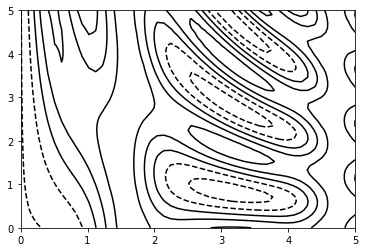

In [4]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)
X,Y = np.meshgrid(x,y)
Z =  np.sin(X)**10 + np.cos(10 + Y*X)*np.cos(X)
fig, ax = plt.subplots()
ax.contour(X,Y,Z,5,colors='k')

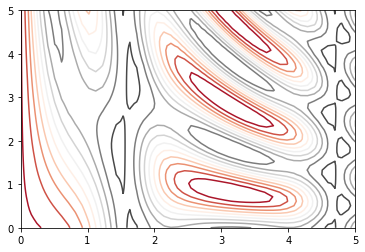

In [5]:
#usando colormaps
fig, ax = plt.subplots()
ax.contour(X,Y,Z,10, cmap='RdGy')

<a list of 28 text.Text objects>

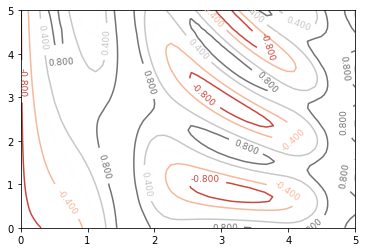

In [6]:
fig, ax = plt.subplots()
cp = ax.contour(X,Y,Z,5, cmap='RdGy')
ax.clabel(cp,fontsize=9)

**2. Plots com plt.contourf**

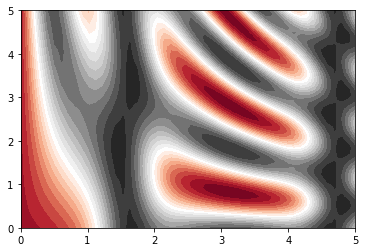

In [7]:
fig, ax = plt.subplots()
ax.contourf(X,Y,Z,20, cmap='RdGy')

**3. Plots com plt.imshow**

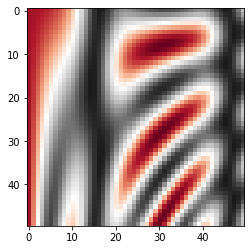

In [8]:
fig, ax = plt.subplots()
ax.imshow(Z,cmap='RdGy')

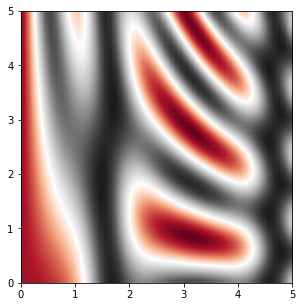

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
ax.imshow(Z, extent=[0, 5, 0, 5], origin='lower', 
          interpolation='bilinear',cmap='RdGy')

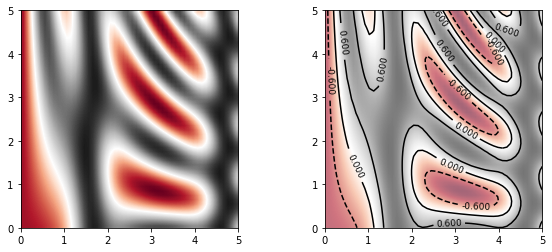

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(Z, extent=[0, 5, 0, 5], origin='lower', 
          interpolation='bilinear',cmap='RdGy')
cp = ax[1].contour(X,Y,Z,3,colors='k')
ax[1].clabel(cp,fontsize=9)
ax[1].imshow(Z, extent=[0, 5, 0, 5], origin='lower', 
          interpolation='bilinear',alpha=0.6,cmap='RdGy')
#fig.colorbar(mappable = im)
#plt.savefig('plot_15.png')

**4. Adicionando colorbar()**

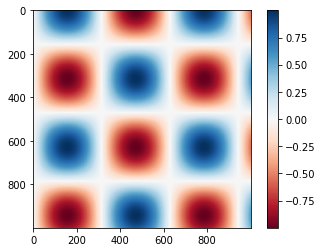

In [11]:
#colorbar
fig1, ax = plt.subplots()
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)
X,Y = np.meshgrid(x,y)
I = np.sin(X) * np.cos(Y)
im= ax.imshow(I,cmap='RdBu')
fig1.colorbar(im)

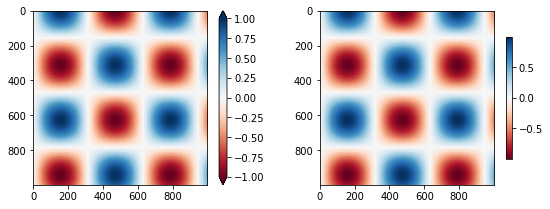

In [12]:
fig, (ax1,ax2) = plt.subplots(figsize=(8,3),ncols=2)
im1= ax1.imshow(I,cmap='RdBu', vmin=-1.0, vmax=1.0)
fig.colorbar(im1,ax=ax1,orientation='vertical', extend='both') 
im2= ax2.imshow(I,cmap='RdBu')
fig.colorbar(im2,ax=ax2,shrink=0.7) 
fig.tight_layout()

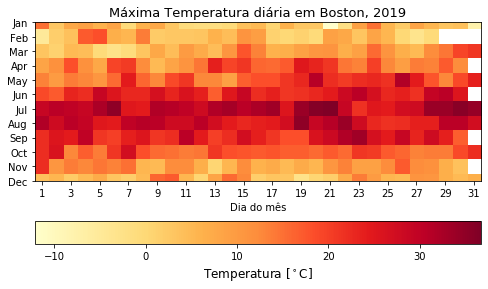

In [13]:
#ler o arquivo boston_temp2019.dat
#A primeira coluna é a data e a segunda a temperatura
#Vamos criar listas vazias para guardar os meses, dias e temperaturas
meses = []
dias = []
temp = []
file1 = open('../pcientifico_dados/boston_temp2019.dat')                                                                 
for line in file1: 
    l1 = line.split() 
    #print(l1[0][4:6],' ',l1[0][6:]) #se tiver dúvida, imprima descomente essa linha
    meses.append(int(l1[0][4:6]))
    dias.append(int(l1[0][6:]))
    temp.append(float(l1[1]))
    
# Vamos usar o atributo np.nan (Not a Number) para datas que não existem (ex. 30 de fev)
heatmap = np.empty((12, 31))
heatmap[:] = np.nan

#Agora, os indices do heatmap vao ser [mes,dia]. Note que meses e dias reais começam em 1
for mes, dia,T in zip(meses,dias,temp):
    heatmap[mes-1, dia-1] = T

# Plotar o heatmap, customizar label e ticks.Escolhemos um cmap sequential
fig1, ax = plt.subplots(figsize=(8,5))
im = ax.imshow(heatmap, interpolation='nearest',cmap='YlOrRd')
ax.set_yticks(range(12))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
days = np.array(range(0, 31, 2))
ax.set_xticks(days)
ax.set_xticklabels(['{}'.format(day+1) for day in days])
ax.set_xlabel('Dia do mês')
ax.set_title('Máxima Temperatura diária em Boston, 2019',fontsize=13)

# Adiciona um colorbar horizontal
cbar = fig1.colorbar(mappable=im, orientation='horizontal')
cbar.set_label('Temperatura [$^\circ\mathrm{C}$]',fontsize=12)
plt.savefig('plot_test.eps')

**5. Plots 3D**

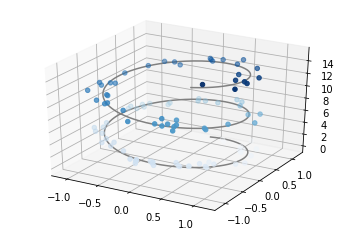

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
zline = np.linspace(0, 15, 500)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot(xline, yline, zline, 'gray')
zdata = 15*np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter(xdata, ydata, zdata, c=zdata, cmap='Blues')

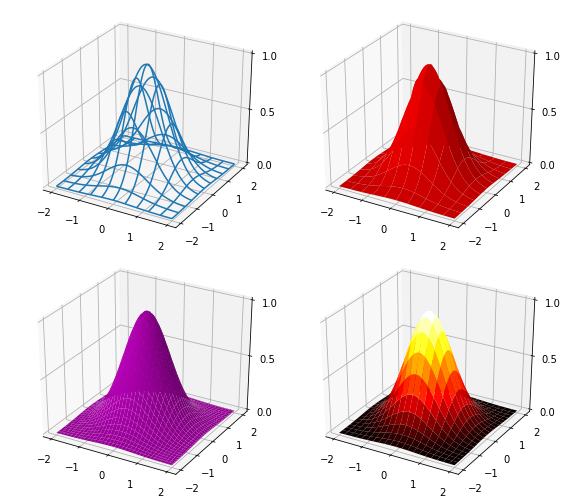

In [15]:
x = np.linspace(-2, 2, 400)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))
fig, ax = plt.subplots(figsize=(8,7),nrows=2, ncols=2, subplot_kw={'projection': '3d'})
ax[0,0].plot_wireframe(X, Y, Z, rstride=40, cstride=40)
ax[0,1].plot_surface(X, Y, Z, rstride=40, cstride=40, color='r')
ax[1,0].plot_surface(X, Y, Z, rstride=12, cstride=12, color='m')
ax[1,1].plot_surface(X, Y, Z, rstride=20, cstride=20, cmap='hot')
for axes in ax.flatten():
    axes.set_xticks([-2, -1, 0, 1, 2])
    axes.set_yticks([-2, -1, 0, 1, 2])
    axes.set_zticks([0, 0.5, 1])
fig.tight_layout()

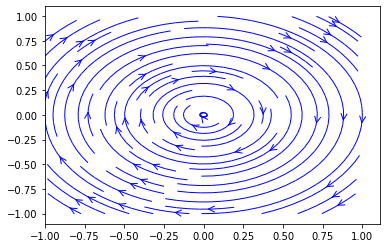

In [16]:
xx = np.linspace(-1,1,11)
X,Y = np.meshgrid(xx,xx)
Vx,Vy = Y,-X
plt.streamplot(X,Y,Vx,Vy,color='b', linewidth=1,
              density=1, arrowstyle='->', arrowsize=1.5)